In [1]:
from torch import nn
import torch
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from cgan import GAN, D_model, G_model
import torch.nn.functional as F

In [2]:
EPOCHES = 15
batch_size = 32
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = D_model(10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


transform = T.ToTensor()

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)


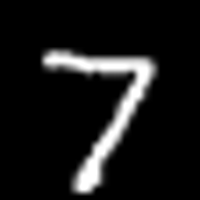

In [3]:
dataiter = iter(testloader)
images, labels = next(dataiter)


random_image = images[0] 
display(T.ToPILImage()(random_image.squeeze(0)).resize((200, 200)))

In [4]:
random_image.shape

torch.Size([1, 28, 28])

In [5]:
# training loop
# for _ in range(EPOCHES):
#     running_loss = 0
#     for X, label in trainloader:
#         X = X.to(device)
#         label = label.to(device)
#         optimizer.zero_grad()
#         pred = model(X)
#         loss = criterion(pred, label)
#         loss.backward()
        
#         optimizer.step()
#         running_loss += loss.item()
#     print(running_loss)



### FGSM attack

In [6]:
def t_fgsm(img, model, target, eps): 
    x = nn.Parameter(img.unsqueeze(0))

    pred = model(x)
    loss = criterion(pred, target)
    loss.backward()

    x_ = x - eps / 255 * torch.sign(x.grad)
    return torch.clip(x_, min=0, max=1)


def u_fgsm(img, model, correct, eps):
    x = nn.Parameter(img.unsqueeze(0))

    pred = model(x)
    loss = criterion(pred, correct)
    loss.backward()

    x_ = x + eps / 255 * torch.sign(x.grad)
    return torch.clip(x_, min=0, max=1)

In [7]:
# model = torch.load("model1.pt")
# model.eval()

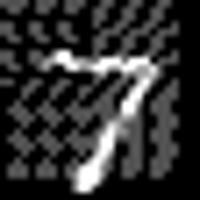

tensor([[0.1070, 0.1012, 0.0915, 0.1050, 0.0911, 0.1009, 0.0983, 0.1057, 0.1041,
         0.0952]])


In [8]:
target = torch.tensor([7])
new_img = u_fgsm(random_image, model, target, 80)

display(T.ToPILImage()(new_img.squeeze(0)).resize((200, 200)))

with torch.no_grad():
    pred = model(new_img)
    probs = F.softmax(pred, dim=-1)
    print(probs)

# mb the dataset is too easy???????? 

In [9]:
X, labels = next(iter(trainloader))
X.shape

torch.Size([32, 1, 28, 28])

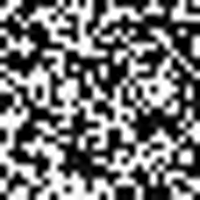

In [10]:
tmp = G_model()
display(T.ToPILImage()(tmp(random_image.squeeze(0))).resize((200, 200)))


In [11]:
model = GAN(1)
# criterion = nn.BCEWithLogitsLoss()?
G_loss_lst, D_loss_lst = model.train(dataloader=trainloader)
# criterion(model.D(images).squeeze(-1), torch.zeros(32))

  0%|          | 0/10 [00:00<?, ?it/s]

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: Fa

  0%|          | 0/10 [00:17<?, ?it/s]


KeyboardInterrupt: 